<a href="https://colab.research.google.com/github/iu5git/Deep-learning/blob/main/notebooks/Text_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

# Задание

Выбрать свой корпус текста и обучить последовательно на нём три архитектуры нейронных сетей на
задаче Next Token Prediction (предсказание следующего токена).

Архитектуры:
* Одномерная свёрточная нейронная сеть
* Рекуррентная нейронная сеть
* Трансформер кодировщик

Визуализировать полученное векторное представление токенов. Сохранить модели в формате onnx.

Дописать код для генерации текста по входной последовательности.

В качестве примера приводится обучение на русском корпусе текста - произведении
Ф.М. Достоевского "Преступление и наказание".

Отчет должен содержать: титульный лист, задание с вариантом корпуса текста, скриншоты и краткие пояснения по каждому этапу лабораторной работы, визуализация векторного представления, итоговую таблицу со результатами для всех вариантов обучения


# Контрольные вопросы
1. Предобработка текста
2. Архитектура трансформер
3. Удаление шумовых слов
4. Стемминг и лемматизация
5. Что такое эмбеддинг?

# Выполнение лабораторной работы

## Установка зависимостей

In [ ]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 65.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: google-auth-oauthlib
    Fo

In [ ]:
#https://stackoverflow.com/a/51001727
#https://stackoverflow.com/a/74561909
#https://developer.nvidia.com/cuda-11.3.0-download-archive?target_os=Linux&target_arch=x86_64&Distribution=Ubuntu&target_version=20.04&target_type=deb_local
!nvcc --version
!lsb_release -a

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-ubuntu2004.pin
!mv cuda-ubuntu2004.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget https://developer.download.nvidia.com/compute/cuda/11.3.0/local_installers/cuda-repo-ubuntu2004-11-3-local_11.3.0-465.19.01-1_amd64.deb
!dpkg -i cuda-repo-ubuntu2004-11-3-local_11.3.0-465.19.01-1_amd64.deb
!apt-key add /var/cuda-repo-ubuntu2004-11-3-local/7fa2af80.pub
!apt-get update
!apt-get -y install cuda-11-3

--2023-05-13 20:51:07--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-ubuntu2004.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [application/octet-stream]
Saving to: ‘cuda-ubuntu2004.pin’

cuda-ubuntu2004.pin 100%[===================>]     190  --.-KB/s    in 0s      

2023-05-13 20:51:07 (5.35 MB/s) - ‘cuda-ubuntu2004.pin’ saved [190/190]

--2023-05-13 20:51:08--  https://developer.download.nvidia.com/compute/cuda/11.3.0/local_installers/cuda-repo-ubuntu2004-11-3-local_11.3.0-465.19.01-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 O

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!pip install "torch==1.11.0+cu113" --index https://download.pytorch.org/whl/

Looking in indexes: https://download.pytorch.org/whl/, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 GB 974.9 kB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.11.0+cu113 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.11.0+cu113 which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.11.0+cu113 which is incompatible.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.11.0+cu113 which is incompatible.


!!!




**После установки необходимо перезапустить среду выполнения!**



!!!

In [ ]:
!pip install sentencepiece
!pip install umap-learn
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=e5b33e78cc9160b851abdf9adeb6b4d75d50af2455bafb8e921d34e4cb3c3b2b
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=2a448bfd57099b9fbf47a339b404944ec454bbf8166548f4ce2563b9d1a0be6f
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/

## Подключение библиотек

In [ ]:
from string import punctuation
import math
import time
import os

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from umap import UMAP
import sentencepiece as spm

import torch
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline

In [ ]:
print(torch.__version__)
print(torch.cuda.is_available())

1.11.0+cu113
True


## Где взять датасеты
* https://nlpub.ru/Ресурсы - русские наборы данных

* https://huggingface.co/datasets - мультиязычные наборы данных

* https://avidreaders.ru/books/ - книги в txt 

* https://z-lib.org/ - книги в pdf, txt

* https://pdftotext.com/ - онлайн конвертер из pdf в txt

## Загрузка необработанного корпуса

In [ ]:
!gdown --id 1MO6aev-2UUpZlwF0o4ZVGvQLi1YfZhck

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MO6aev-2UUpZlwF0o4ZVGvQLi1YfZhck
To: /content/prestuplenie-i-nakazanie.txt
100% 1.28M/1.28M [00:00<00:00, 89.4MB/s]


## Очистка корпуса от пунктуации

<Axes: >

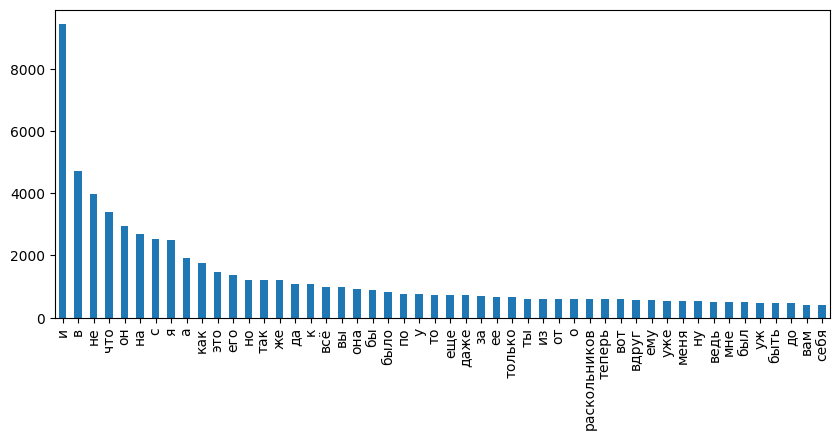

In [ ]:
def filter_punctuation(x):
    table = str.maketrans('', '', punctuation)
    x = map(lambda x: x.lower(), x)
    x = map(lambda x: x.translate(table), x)
    x = filter(lambda x: len(x)>0, x)
    return list(x)

FILENAME = 'prestuplenie-i-nakazanie.txt' 
corpus = []
# encoding может быть один из ['ascii', 'utf-8', 'cp1251']
with open(FILENAME, 'r',
          encoding='cp1251') as f:
    for line in f:
        corpus.extend(list(filter(lambda x: len(x)>0, line.split())))

corpus = filter_punctuation(corpus)
with open('corpus.txt', 'w') as f:
    f.write('\n'.join(corpus))
corpus_df = pd.Series(corpus)
corpus_df.value_counts().head(50).plot(kind='bar', figsize=(10, 4))

## Вывод наиболее частых слов

In [ ]:
pd.Series(corpus).value_counts()

и               9435
в               4716
не              3971
что             3400
он              2962
                ... 
относительны       1
способностям       1
разрушители        1
преступают         1
aug                1
Length: 31090, dtype: int64

## Обучение токенизатора на корпусе текста
Используется алгоритм [WordPiece](https://paperswithcode.com/method/wordpiece)


In [ ]:
spm.SentencePieceTrainer.train(input='corpus.txt',
                               model_prefix='m',
                               model_type='bpe', #'unigram', 'word', 'char'
                               vocab_size=10000)

## Проверка токенизатора 

In [ ]:
sp = spm.SentencePieceProcessor(model_file='m.model')
prompt = 'это пример токенизации текста'
print(sp.encode_as_ids(prompt)) # == sp.encode 
print(sp.encode_as_pieces(prompt))

[77, 4383, 47, 9958, 76, 142, 1355, 3573, 128]
['▁это', '▁пример', '▁то', 'к', 'ени', 'за', 'ции', '▁тек', 'ста']


## Получение словаря токенов

In [ ]:
vocabs = [[sp.id_to_piece(id), id] for id in range(sp.get_piece_size())]
vocabs[:20]

[['<unk>', 0],
 ['<s>', 1],
 ['</s>', 2],
 ['▁в', 3],
 ['▁п', 4],
 ['▁с', 5],
 ['▁н', 6],
 ['то', 7],
 ['▁и', 8],
 ['▁о', 9],
 ['ко', 10],
 ['но', 11],
 ['▁д', 12],
 ['го', 13],
 ['ра', 14],
 ['▁по', 15],
 ['ро', 16],
 ['ст', 17],
 ['ен', 18],
 ['ал', 19]]

## Создание набора данных для задачи Next Token Prediction

In [ ]:
def get_window(x):
    XX.append(x.values.copy())
    return 0

WINDOW_SIZE = 16
XX = []
corpus_df = pd.DataFrame(np.concatenate(sp.encode(corpus)))
corpus_df.columns = ['token_ids']
corpus_df['ids'] = corpus_df['token_ids'].factorize(sort=True)[0]
corpus_df['ids'].rolling(WINDOW_SIZE+1).apply(get_window)
table = corpus_df[['token_ids', 'ids']].\
                 drop_duplicates().\
                 sort_values(['ids'], ascending=True).\
                 values
ids2token_ids = {v:k for k,v  in table}

In [ ]:
data = np.uint16(XX)
X = data[:, :WINDOW_SIZE].copy()
y = data[:, WINDOW_SIZE:].copy()

indexes = np.random.permutation(y.size)
X = X[indexes].copy()
y = y[indexes].copy()
assert np.unique(X).size == np.unique(y).size, \
    'Уменьшите размер словаря при обучении токенизатора'

## Обучение в Keras (прототипирование)

In [ ]:
import tensorflow as tf

inp = tf.keras.layers.Input((WINDOW_SIZE,))
x = tf.keras.layers.Embedding(np.unique(X).size, output_dim=50)(inp)
#x = tf.keras.layers.LSTM(128, return_sequences=False)(x)
#x = tf.keras.layers.Lambda(lambda xx: tf.transpose(xx, perm=[0, 2, 1]))(x)
x = tf.keras.layers.Conv1D(128, (5,), strides=(2,), activation='relu')(x)
x = tf.keras.layers.Conv1D(256, (5,), strides=(2,), activation='relu')(x)
#x = tf.keras.layers.Lambda(lambda xx: tf.transpose(xx, perm=[0, 2, 1]))(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
out = tf.keras.layers.Dense(np.unique(y).size, activation='softmax')(x)

model = tf.keras.models.Model(inp, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 embedding (Embedding)       (None, 16, 50)            499300    
                                                                 
 conv1d (Conv1D)             (None, 6, 128)            32128     
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 256)            164096    
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 9986)              2566402   
                                                             

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.SparseTopKCategoricalAccuracy(5)])
#model = tf.keras.models.load_model('model.h5')

In [ ]:
tf.keras.backend.set_value(model.optimizer.lr, 2e-3)
model.fit(X, y, validation_split=0.0, epochs=20, batch_size=1024)

Epoch 1/20
276/276 [==============================] - 12s 42ms/step - loss: 6.7840 - accuracy: 0.0391 - sparse_top_k_categorical_accuracy: 0.1293
Epoch 2/20
276/276 [==============================] - 11s 39ms/step - loss: 6.6346 - accuracy: 0.0432 - sparse_top_k_categorical_accuracy: 0.1377
Epoch 3/20
276/276 [==============================] - 10s 38ms/step - loss: 6.4858 - accuracy: 0.0473 - sparse_top_k_categorical_accuracy: 0.1466
Epoch 4/20
276/276 [==============================] - 10s 38ms/step - loss: 6.3192 - accuracy: 0.0518 - sparse_top_k_categorical_accuracy: 0.1563
Epoch 5/20
276/276 [==============================] - 10s 37ms/step - loss: 6.1178 - accuracy: 0.0562 - sparse_top_k_categorical_accuracy: 0.1659
Epoch 6/20
276/276 [==============================] - 10s 37ms/step - loss: 5.8645 - accuracy: 0.0625 - sparse_top_k_categorical_accuracy: 0.1783
Epoch 7/20
276/276 [==============================] - 10s 38ms/step - loss: 5.5494 - accuracy: 0.0728 - sparse_top_k_categor

In [ ]:
model.save('model.h5')

In [ ]:
model.get_weights()[0].shape

(9986, 50)

In [ ]:
batch_size = 1024
preds = []
for i in tqdm(range(X.shape[0]//batch_size+1)):
    preds.append(model.predict(X[i*batch_size:(i+1)*batch_size].copy()).\
                 argsort(axis=-1)[:, -5:].copy())
preds = np.concatenate(preds)

  0%|          | 0/276 [00:00<?, ?it/s]

In [ ]:
for i in range(preds.shape[1]):
    corpus_df['pred@%d'%(i+1)] = -1
    corpus_df.loc[WINDOW_SIZE:, 'pred@%d'%(i+1)] = preds[:,-i]
corpus_df.head(50)

,token_ids,ids,pred@1,pred@2,pred@3,pred@4,pred@5
0,2519,2514,-1,-1,-1,-1,-1
1,2731,2725,-1,-1,-1,-1,-1
2,262,260,-1,-1,-1,-1,-1
3,13,11,-1,-1,-1,-1,-1
4,42,40,-1,-1,-1,-1,-1
5,1344,1339,-1,-1,-1,-1,-1
6,445,442,-1,-1,-1,-1,-1
7,3,1,-1,-1,-1,-1,-1
8,1110,1105,-1,-1,-1,-1,-1
9,507,503,-1,-1,-1,-1,-1


In [ ]:
for col in corpus_df.columns[-preds.shape[1]:]:
    corpus_df[col] = corpus_df[col].apply(lambda x: ids2token_ids.get(x, -1))

In [ ]:
sp.decode(corpus_df['pred@1'].tolist()[WINDOW_SIZE:])
#(corpus_df.token_ids==corpus_df[corpus_df.columns[-preds.shape[1]:]])

'авдотья словамлосьу буд особенно иы первы социальныму подся странно дама ник изий выоаго ту минутест уме голов совершенно предлага иом собственно какуюам иногут хозяйк межб ним что зате александровн на2сь оня как ихародя я блудниц ились себя не и сй ожидании на безй49 даертже будуще вниманиекуомч убиляконечно к в умеи мармеладовюыяхто к часть посооку комнату углу быости не пушкинотчасть время у на евангели  послышалеет они больнывшийтои время на он разговордатьм и соня какие в что минут мне не да так то дал я вяа один он коль не порог с49еишь бледно вилим большо засмеял в от петербургскися всегда неже да не и у какне что в по какть ицеа что с начала квартиру ков зловто верите что дикее обществ работникуда котор иек на ягоого нашел пожалуй переулок вов точу моглвидишьи так но вы он хорошо написапри того не второй иии признакочки газета и вы теме что я не давестис с он и положилмосьсти и него вонто прий  вер видитеий сами рукасмотря на пишет ее и даan39 см на одномуся ивановн я существу

In [ ]:
#from sklearn.decomposition import PCA
embeddings = UMAP(n_components=2, random_state=2).\
                                          fit_transform(model.get_weights()[0])

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


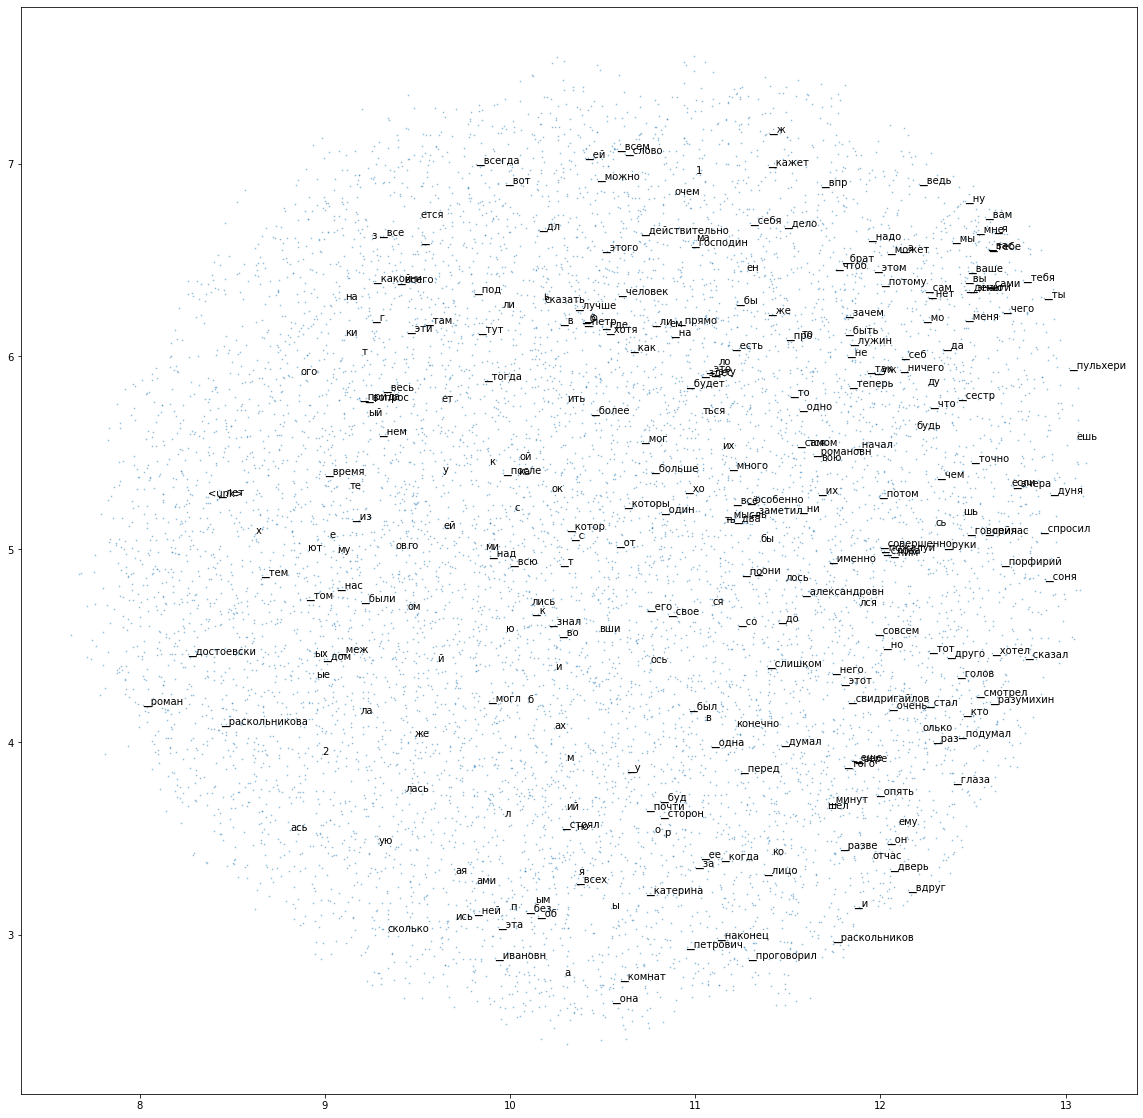

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(embeddings[:, 0], embeddings[:, 1], s=0.5, alpha=0.4)

whitelist = frozenset(corpus_df.token_ids.value_counts().index[:300].values)
for i, txt in enumerate(embeddings):
    token_id = ids2token_ids[i]
    if token_id not in whitelist:
        continue
    ax.annotate(vocabs[token_id][0],
                (embeddings[i][0], embeddings[i][1]))
plt.savefig('vecs.svg')

## Обучение в Pytorch
пример основан на

https://github.com/pytorch/examples/tree/master/word_language_model

In [ ]:
class ConvModel(nn.Module):
    """Container module with an encoder, a convolutional module, and a decoder."""

    def __init__(self, ntoken, ninp, nhid, dropout=0.1, tie_weights=False):
        super(ConvModel, self).__init__()
        self.ntoken = ntoken
        self.drop = nn.Dropout(dropout)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.conv = nn.Sequential(
                    nn.Conv1d(ninp, nhid//2, 5, stride=3, padding=2, dilation=1),
                    nn.ReLU(),
                    nn.Conv1d(nhid//2, nhid, 5, stride=3, padding=2, dilation=1),
                    nn.ReLU(),
                    nn.Conv1d(nhid, nhid*2, 5, stride=3, padding=2, dilation=1),
                    nn.ReLU(),
                    )
        self.decoder = nn.Linear(nhid*2, ntoken)

        self.init_weights()

        self.nhid = nhid
        self.model_type = 'Conv'

    def init_weights(self):
        initrange = 0.1
        nn.init.uniform_(self.encoder.weight, -initrange, initrange)
        nn.init.zeros_(self.decoder.bias)
        nn.init.uniform_(self.decoder.weight, -initrange, initrange)

    def forward(self, inputs):
        emb = self.drop(self.encoder(inputs))
        emb = emb.transpose(2, 1)
        output = self.conv(emb)
        #print(output.size())
        output = self.drop(output)
        output = output.transpose(2, 1)
        decoded = self.decoder(output)
        #print(decoded.size())
        decoded = decoded.view(-1, self.ntoken)
        return F.log_softmax(decoded, dim=1)


class RNNModel(nn.Module):
    """Container module with an encoder, a recurrent module, and a decoder."""

    def __init__(self, rnn_type, ntoken, ninp, nhid, nlayers, dropout=0.1, tie_weights=False):
        super(RNNModel, self).__init__()
        self.ntoken = ntoken
        self.drop = nn.Dropout(dropout)
        self.encoder = nn.Embedding(ntoken, ninp)
        if rnn_type in ['LSTM', 'GRU']:
            self.rnn = getattr(nn, rnn_type)(ninp, nhid, nlayers, dropout=dropout)
        else:
            try:
                nonlinearity = {'RNN_TANH': 'tanh', 'RNN_RELU': 'relu'}[rnn_type]
            except KeyError:
                raise ValueError( """An invalid option for `--model` was supplied,
                                 options are ['LSTM', 'GRU', 'RNN_TANH' or 'RNN_RELU']""")
            self.rnn = nn.RNN(ninp, nhid, nlayers, nonlinearity=nonlinearity, dropout=dropout)
        self.decoder = nn.Linear(nhid, ntoken)

        # Optionally tie weights as in:
        # "Using the Output Embedding to Improve Language Models" (Press & Wolf 2016)
        # https://arxiv.org/abs/1608.05859
        # and
        # "Tying Word Vectors and Word Classifiers: A Loss Framework for Language Modeling" (Inan et al. 2016)
        # https://arxiv.org/abs/1611.01462
        if tie_weights:
            if nhid != ninp:
                raise ValueError('When using the tied flag, nhid must be equal to emsize')
            self.decoder.weight = self.encoder.weight

        self.init_weights()

        self.rnn_type = rnn_type
        self.nhid = nhid
        self.nlayers = nlayers

    def init_weights(self):
        initrange = 0.1
        nn.init.uniform_(self.encoder.weight, -initrange, initrange)
        nn.init.zeros_(self.decoder.bias)
        nn.init.uniform_(self.decoder.weight, -initrange, initrange)

    def forward(self, input, hidden):
        emb = self.drop(self.encoder(input))
        output, hidden = self.rnn(emb, hidden)
        output = self.drop(output)
        decoded = self.decoder(output)
        decoded = decoded.view(-1, self.ntoken)
        return F.log_softmax(decoded, dim=1), hidden

    def init_hidden(self, bsz):
        weight = next(self.parameters())
        if self.rnn_type == 'LSTM':
            return (weight.new_zeros(self.nlayers, bsz, self.nhid),
                    weight.new_zeros(self.nlayers, bsz, self.nhid))
        else:
            return weight.new_zeros(self.nlayers, bsz, self.nhid)

# Temporarily leave PositionalEncoding module here. Will be moved somewhere else.
class PositionalEncoding(nn.Module):
    r"""Inject some information about the relative or absolute position of the tokens in the sequence.
        The positional encodings have the same dimension as the embeddings, so that the two can be summed.
        Here, we use sine and cosine functions of different frequencies.
    .. math:
        \text{PosEncoder}(pos, 2i) = sin(pos/10000^(2i/d_model))
        \text{PosEncoder}(pos, 2i+1) = cos(pos/10000^(2i/d_model))
        \text{where pos is the word position and i is the embed idx)
    Args:
        d_model: the embed dim (required).
        dropout: the dropout value (default=0.1).
        max_len: the max. length of the incoming sequence (default=5000).
    Examples:
        >>> pos_encoder = PositionalEncoding(d_model)
    """

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        r"""Inputs of forward function
        Args:
            x: the sequence fed to the positional encoder model (required).
        Shape:
            x: [sequence length, batch size, embed dim]
            output: [sequence length, batch size, embed dim]
        Examples:
            >>> output = pos_encoder(x)
        """

        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class TransformerModel(nn.Module):
    """Container module with an encoder, a recurrent or transformer module, and a decoder."""

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.1):
        super(TransformerModel, self).__init__()
        try:
            from torch.nn import TransformerEncoder, TransformerEncoderLayer
        except:
            raise ImportError('TransformerEncoder module does not exist in PyTorch 1.1 or lower.')
        self.model_type = 'Transformer'
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        # https://github.com/pytorch/pytorch/issues/28508
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        nn.init.uniform_(self.encoder.weight, -initrange, initrange)
        nn.init.zeros_(self.decoder.bias)
        nn.init.uniform_(self.decoder.weight, -initrange, initrange)

    def forward(self, src, has_mask=True):
        if has_mask:
            device = src.device
            if self.src_mask is None or self.src_mask.size(0) != len(src):
                mask = self._generate_square_subsequent_mask(len(src)).to(device)
                self.src_mask = mask
        else:
            self.src_mask = None
        #src = src.type(torch.int64)
        
        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, self.src_mask)
        output = self.decoder(output)
        return F.log_softmax(output, dim=-1)

In [ ]:
###############################################################################
# Training code
###############################################################################

def repackage_hidden(h):
    """Wraps hidden states in new Tensors, to detach them from their history."""

    if isinstance(h, torch.Tensor):
        return h.detach()
    else:
        return tuple(repackage_hidden(v) for v in h)


# get_batch subdivides the source data into chunks of length args.bptt.
# If source is equal to the example output of the batchify function, with
# a bptt-limit of 2, we'd get the following two Variables for i = 0:
# ┌ a g m s ┐ ┌ b h n t ┐
# └ b h n t ┘ └ c i o u ┘
# Note that despite the name of the function, the subdivison of data is not
# done along the batch dimension (i.e. dimension 1), since that was handled
# by the batchify function. The chunks are along dimension 0, corresponding
# to the seq_len dimension in the LSTM.

def get_batch(source, i):
    seq_len = min(bptt, len(y) - 1 - i)
    return torch.LongTensor(X[i:i+seq_len].astype(np.int32)).to(device), \
           torch.LongTensor(y[i:i+seq_len].astype(np.int32)).to(device)


def evaluate(data_source):
    # Turn on evaluation mode which disables dropout.
    model.eval()
    total_loss = 0.
    ntokens = np.unique(y).size
    model_types = frozenset(['Transformer', 'Conv'])

    if model_type not in model_types:
        hidden = model.init_hidden(WINDOW_SIZE)
    with torch.no_grad():
        for i in range(0, y.size - 1, bptt):
            data, targets = get_batch(y, i)
            if model_type == 'Transformer':
                output = model(data)
                output = output[:, -1, :]
            elif model_type == 'Conv':
                output = model(data)
                output = output.view(data.size()[0], -1, ntokens)[:, -1]
            else:
                output, hidden = model(data, hidden)
                hidden = repackage_hidden(hidden)
                output = output.view(-1, WINDOW_SIZE, ntokens)[:, -1]
            #print(output.size())
            total_loss += len(data) * criterion(output, targets.squeeze(1)).item()
    return total_loss / (len(data_source) - 1)


def train(batch_size=128):
    # Turn on training mode which enables dropout.
    model.train()
    total_loss = 0.
    start_time = time.time()
    ntokens = np.unique(y).size
    model_types = frozenset(['Transformer', 'Conv'])
    if model_type not in model_types:
        hidden = model.init_hidden(WINDOW_SIZE)
    for batch, i in enumerate(range(0, y.size - 1, bptt)):
        data, targets = get_batch(y, i)
        # Starting each batch, we detach the hidden state from how it was previously produced.
        # If we didn't, the model would try backpropagating all the way to start of the dataset.
        model.zero_grad()
        if model_type == 'Transformer':
            output = model(data)
            #output = output.view(-1, ntokens)
            output = output[:, -1]
        elif model_type == 'Conv':
            output = model(data)
            output = output.view(data.size()[0], -1, ntokens)[:, -1]
        else:
            hidden = repackage_hidden(hidden)
            output, hidden = model(data, hidden)
            output = output.view(-1, WINDOW_SIZE, ntokens)[:, -1]
        loss = criterion(output, targets.squeeze(1))
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        for p in model.parameters():
            p.data.add_(p.grad, alpha=-lr)

        total_loss += loss.item()

        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | lr {:02.2f} | ms/batch {:5.3f} | '
                    'loss {:5.2f} | ppl {:8.2f}'.format(
                epoch, batch, len(y) // bptt, lr,
                elapsed * 1000 / log_interval, cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()
        if dry_run:
            break


def export_onnx(path, batch_size, seq_len):
    print('The model is also exported in ONNX format at {}.'.format(os.path.realpath(path)))
    model.eval()
    dummy_input = torch.LongTensor(seq_len * batch_size).zero_().view(-1, seq_len).to(device)
    inputs = dummy_input
    model_types = frozenset(['Transformer', 'Conv'])
    if model_type not in model_types:
        hidden = model.init_hidden(WINDOW_SIZE)
        inputs = (dummy_input, hidden)
    torch.onnx.export(model, inputs, path, opset_version=10)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Обучение свёрточной модели Conv1d

In [ ]:
model = ConvModel(np.unique(y).size, 128, 192, 0.1).to(device)
criterion = nn.NLLLoss()
model

ConvModel(
  (drop): Dropout(p=0.1, inplace=False)
  (encoder): Embedding(9703, 128)
  (conv): Sequential(
    (0): Conv1d(128, 96, kernel_size=(5,), stride=(3,), padding=(2,))
    (1): ReLU()
    (2): Conv1d(96, 192, kernel_size=(5,), stride=(3,), padding=(2,))
    (3): ReLU()
    (4): Conv1d(192, 384, kernel_size=(5,), stride=(3,), padding=(2,))
    (5): ReLU()
  )
  (decoder): Linear(in_features=384, out_features=9703, bias=True)
)

In [ ]:
model_type = 'Conv'
lr = 1
bptt = 64
eval_batch_size = bptt
clip = 0.1
log_interval = 100
dry_run = False

### Вывод числа параметров

In [ ]:
print(*[(k, p.view(-1).size()[0]) for k, p in model.named_parameters()],
      sep='\n')
print('Всего: {:,}'.format(sum(p.view(-1).size()[0] for k, p in model.named_parameters())))

('encoder.weight', 1241984)
('conv.0.weight', 61440)
('conv.0.bias', 96)
('conv.2.weight', 92160)
('conv.2.bias', 192)
('conv.4.weight', 368640)
('conv.4.bias', 384)
('decoder.weight', 3725952)
('decoder.bias', 9703)
Всего: 5,500,551


### Проверка прямого прохода модели

In [ ]:
model(torch.ones((32, 16)).type(torch.int64).to(device)).size()

torch.Size([32, 9703])

### Замер времени прохождения по всему корпусу

In [ ]:
%%time
evaluate(y)

CPU times: user 3.79 s, sys: 9.49 ms, total: 3.8 s
Wall time: 3.82 s


9.18026380930687

### Обучение модели

In [ ]:
# Loop over epochs.
epochs = 4
best_val_loss = None
savefile = '%s_next_token.pt'%model_type

patience_max = 1
patience = 0
# At any point you can hit Ctrl + C to break out of training early.
try:
    for epoch in range(1, epochs+1):
        epoch_start_time = time.time()
        train()
        val_loss = evaluate(y)
        print('-' * 89)
        print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.3f} | '
                'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                           val_loss, math.exp(val_loss)))
        print('-' * 89)
        # Save the model if the validation loss is the best we've seen so far.
        if not best_val_loss or val_loss < best_val_loss:
            with open(savefile, 'wb') as f:
                torch.save(model, f)
            best_val_loss = val_loss
            patience = 0
        else:
            patience += 1
            if patience < patience_max: continue 
            with open(savefile, 'rb') as f:
                model = torch.load(f)
            # Anneal the learning rate if no improvement has been seen in the validation dataset.
            lr /= 2.0
            patience = 0
except KeyboardInterrupt:
    print('-' * 89)
    print('Exiting from training early')

| epoch   1 |   100/ 3888 batches | lr 1.00 | ms/batch 10.304 | loss  8.90 | ppl  7313.16
| epoch   1 |   200/ 3888 batches | lr 1.00 | ms/batch 4.699 | loss  8.19 | ppl  3621.17
| epoch   1 |   300/ 3888 batches | lr 1.00 | ms/batch 4.338 | loss  8.08 | ppl  3231.77
| epoch   1 |   400/ 3888 batches | lr 1.00 | ms/batch 4.556 | loss  7.99 | ppl  2953.50
| epoch   1 |   500/ 3888 batches | lr 1.00 | ms/batch 4.839 | loss  7.93 | ppl  2772.71
| epoch   1 |   600/ 3888 batches | lr 1.00 | ms/batch 4.596 | loss  7.90 | ppl  2685.34
| epoch   1 |   700/ 3888 batches | lr 1.00 | ms/batch 4.696 | loss  7.89 | ppl  2679.32
| epoch   1 |   800/ 3888 batches | lr 1.00 | ms/batch 4.680 | loss  7.85 | ppl  2572.44
| epoch   1 |   900/ 3888 batches | lr 1.00 | ms/batch 4.714 | loss  7.87 | ppl  2606.42
| epoch   1 |  1000/ 3888 batches | lr 1.00 | ms/batch 4.647 | loss  7.76 | ppl  2352.91
| epoch   1 |  1100/ 3888 batches | lr 1.00 | ms/batch 4.644 | loss  7.79 | ppl  2421.54
| epoch   1 |  1200/

### Проверка качества, экспорт в ONNX

In [ ]:
# Загрузка лучшей модели.
with open(savefile, 'rb') as f:
    model = torch.load(f)
    # после загрузки параметры RNN находятся не в одном сегменте памяти
    # для помещения в один участок и ускорения прямого прохода
    # В настоящее время, только рекуррентная модель поддерживает flatten_parameters.
    if model_type in ['RNN_TANH', 'RNN_RELU', 'LSTM', 'GRU']:
        model.rnn.flatten_parameters()

# Финальная проверка качества
test_loss = evaluate(y)
print('=' * 89)
print('| End of training | test loss {:5.2f} | test ppl {:8.3f}'.format(
    test_loss, math.exp(test_loss)))
print('=' * 89)

onnx_export = '%s_next_token.onnx'%(model_type)
if len(onnx_export) > 0:
    # Экспортирование модели в формат ONNX
    export_onnx(onnx_export, batch_size=1, seq_len=WINDOW_SIZE)

| End of training | test loss  7.47 | test ppl 1747.912
The model is also exported in ONNX format at /content/Conv_next_token.onnx.


### Получение эмбеддингов, проекция на 2D

In [ ]:
#from sklearn.decomposition import PCA
embeddings = list(model.encoder.parameters())[0].detach().cpu().numpy()

embeddings = UMAP(n_components=2, random_state=2).fit_transform(embeddings)

### Визуализация пространства эмбеддингов

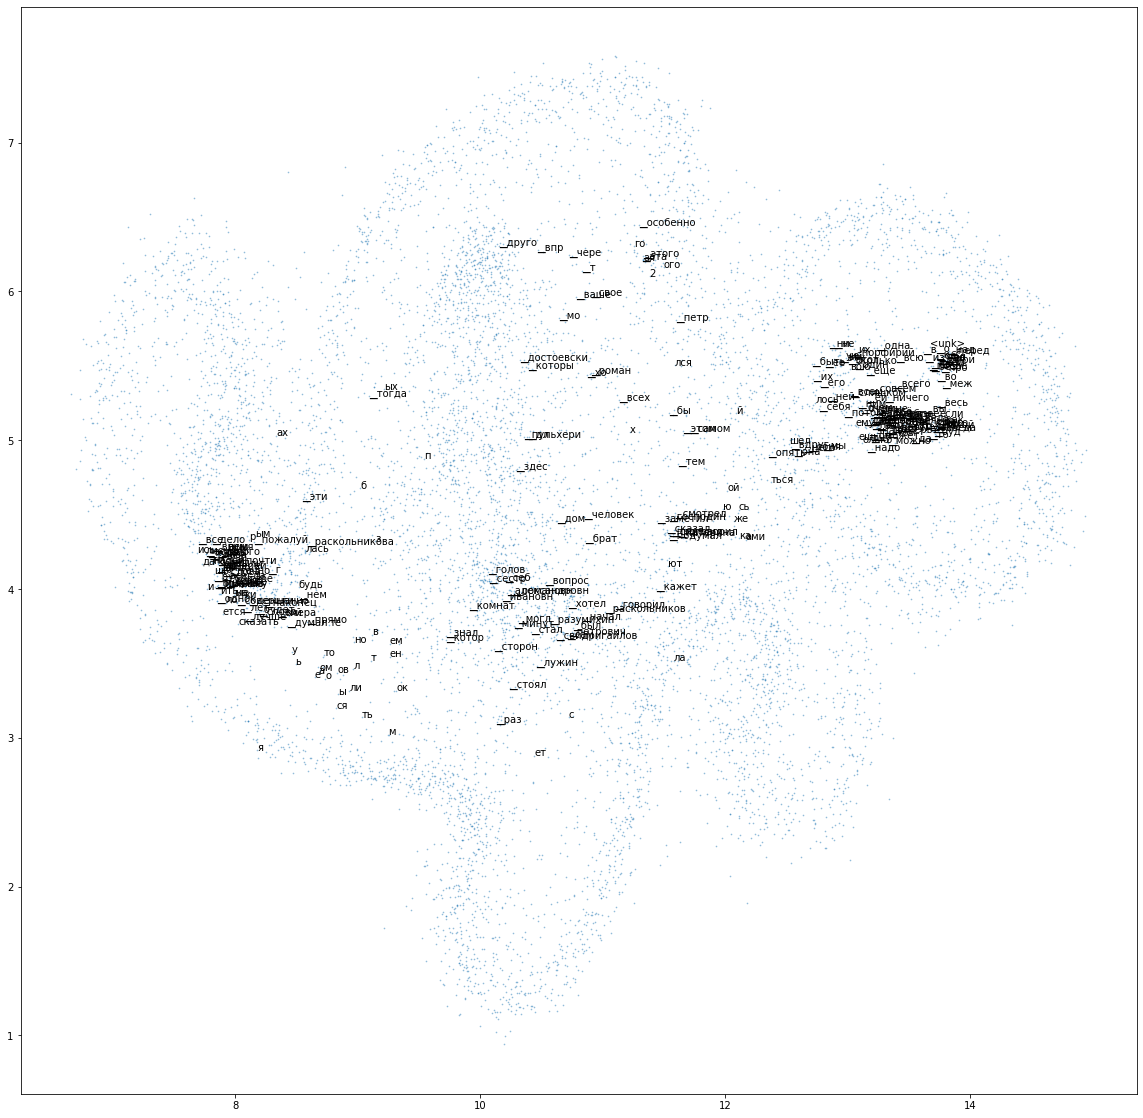

In [ ]:
# Визуализация обученных эмбеддингов
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(embeddings[:, 0], embeddings[:, 1], s=0.5, alpha=0.4)

# берём 300 наиболее частых
whitelist = frozenset(corpus_df.token_ids.value_counts().index[:300].values)
for i, txt in enumerate(embeddings):
    token_id = ids2token_ids[i]
    if token_id not in whitelist:
        continue
    ax.annotate(vocabs[token_id][0],
                (embeddings[i][0], embeddings[i][1]))
plt.savefig('vecs_%s.svg'%model_type)

## Обучение рекуррентной модели LSTM

In [ ]:
model = RNNModel('LSTM', np.unique(y).size, 50, 256, 2, 0.1, False).to(device)
criterion = nn.NLLLoss()
model

RNNModel(
  (drop): Dropout(p=0.1, inplace=False)
  (encoder): Embedding(9703, 50)
  (rnn): LSTM(50, 256, num_layers=2, dropout=0.1)
  (decoder): Linear(in_features=256, out_features=9703, bias=True)
)

In [ ]:
model_type = 'LSTM'
lr=10
bptt = 1024
eval_batch_size = bptt
clip = 0.25
log_interval = 10
dry_run = False

### Вывод числа параметров

In [ ]:
print(*[(k, p.view(-1).size()[0]) for k, p in model.named_parameters()],
      sep='\n')
print('Всего: {:,}'.format(sum(p.view(-1).size()[0] for k, p in model.named_parameters())))

('encoder.weight', 485150)
('rnn.weight_ih_l0', 51200)
('rnn.weight_hh_l0', 262144)
('rnn.bias_ih_l0', 1024)
('rnn.bias_hh_l0', 1024)
('rnn.weight_ih_l1', 262144)
('rnn.weight_hh_l1', 262144)
('rnn.bias_ih_l1', 1024)
('rnn.bias_hh_l1', 1024)
('decoder.weight', 2483968)
('decoder.bias', 9703)
Всего: 3,820,549


### Замер времени прохождения по всему корпусу

In [ ]:
%%time
evaluate(y)

CPU times: user 44.3 s, sys: 4.51 s, total: 48.8 s
Wall time: 48.6 s


9.208568069354813

### Обучение модели

In [ ]:
# Loop over epochs.
epochs = 3
best_val_loss = None
savefile = '%s_next_token.pt'%model_type

# At any point you can hit Ctrl + C to break out of training early.
try:
    for epoch in range(1, epochs+1):
        epoch_start_time = time.time()
        train()
        val_loss = evaluate(y)
        print('-' * 89)
        print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.3f} | '
                'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                           val_loss, math.exp(val_loss)))
        print('-' * 89)
        # Save the model if the validation loss is the best we've seen so far.
        if not best_val_loss or val_loss < best_val_loss:
            with open(savefile, 'wb') as f:
                torch.save(model, f)
            best_val_loss = val_loss
        else:
            # Anneal the learning rate if no improvement has been seen in the validation dataset.
            lr /= 2.0
except KeyboardInterrupt:
    print('-' * 89)
    print('Exiting from training early')

| epoch   1 |    10/  243 batches | lr 10.00 | ms/batch 197.757 | loss  9.95 | ppl 20951.40
| epoch   1 |    20/  243 batches | lr 10.00 | ms/batch 189.986 | loss  8.28 | ppl  3926.26
| epoch   1 |    30/  243 batches | lr 10.00 | ms/batch 180.720 | loss  8.18 | ppl  3561.40
| epoch   1 |    40/  243 batches | lr 10.00 | ms/batch 162.883 | loss  8.08 | ppl  3220.47
| epoch   1 |    50/  243 batches | lr 10.00 | ms/batch 160.068 | loss  8.02 | ppl  3050.52
| epoch   1 |    60/  243 batches | lr 10.00 | ms/batch 158.876 | loss  7.89 | ppl  2672.92
| epoch   1 |    70/  243 batches | lr 10.00 | ms/batch 226.493 | loss  7.88 | ppl  2642.08
| epoch   1 |    80/  243 batches | lr 10.00 | ms/batch 210.609 | loss  7.83 | ppl  2514.80
| epoch   1 |    90/  243 batches | lr 10.00 | ms/batch 236.627 | loss  7.87 | ppl  2620.80
| epoch   1 |   100/  243 batches | lr 10.00 | ms/batch 175.627 | loss  7.78 | ppl  2401.36
| epoch   1 |   110/  243 batches | lr 10.00 | ms/batch 152.508 | loss  7.79 | p

### Проверка качества, экспорт в ONNX

In [ ]:
# Загрузка лучшей модели.
with open(savefile, 'rb') as f:
    model = torch.load(f)
    # после загрузки параметры RNN находятся не в одном сегменте памяти
    # для помещения в один участок и ускорения прямого прохода
    # В настоящее время, только рекуррентная модель поддерживает flatten_parameters.
    if model_type in ['RNN_TANH', 'RNN_RELU', 'LSTM', 'GRU']:
        model.rnn.flatten_parameters()

# Финальная проверка качества
test_loss = evaluate(y)
print('=' * 89)
print('| End of training | test loss {:5.2f} | test ppl {:8.3f}'.format(
    test_loss, math.exp(test_loss)))
print('=' * 89)

onnx_export = '%s_next_token.onnx'%(model_type)
if len(onnx_export) > 0:
    # Экспортирование модели в формат ONNX
    export_onnx(onnx_export, batch_size=1, seq_len=WINDOW_SIZE)

| End of training | test loss  7.82 | test ppl 2484.086
The model is also exported in ONNX format at /content/LSTM_next_token.onnx.


/usr/local/lib/python3.10/dist-packages/torch/onnx/symbolic_opset9.py:2188: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn("Exporting a model to ONNX with a batch_size other than 1, " +


### Получение эмбеддингов, проекция на 2D

In [ ]:
#from sklearn.decomposition import PCA
embeddings = list(model.encoder.parameters())[0].detach().cpu().numpy()

embeddings = UMAP(n_components=2, random_state=2).fit_transform(embeddings)

### Визуализация пространства эмбеддингов

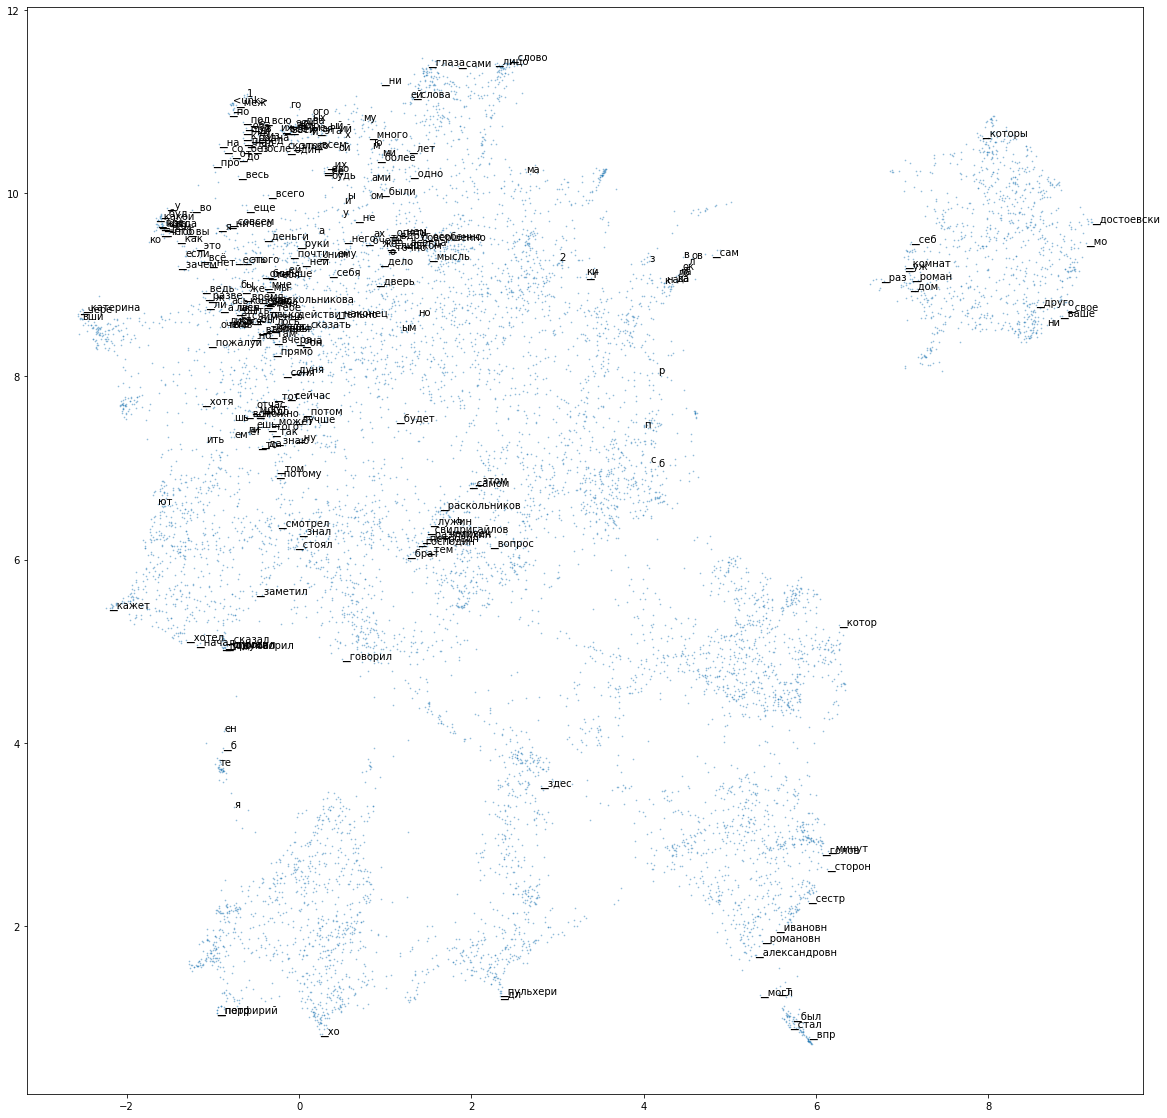

In [ ]:
# Визуализация обученных эмбеддингов
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(embeddings[:, 0], embeddings[:, 1], s=0.5, alpha=0.4)

# берём 300 наиболее частых
whitelist = frozenset(corpus_df.token_ids.value_counts().index[:300].values)
for i, txt in enumerate(embeddings):
    token_id = ids2token_ids[i]
    if token_id not in whitelist:
        continue
    ax.annotate(vocabs[token_id][0],
                (embeddings[i][0], embeddings[i][1]))
plt.savefig('vecs_%s.svg'%model_type)

## Обучение модели self-attention

In [ ]:
model = TransformerModel(np.unique(y).size, 128+32, 4, 192, 2, 0.1).to(device)
# ntoken, ninp, nhead, nhid, nlayers, dropout
criterion = nn.NLLLoss()
model

TransformerModel(
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=160, out_features=160, bias=True)
        )
        (linear1): Linear(in_features=160, out_features=192, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=192, out_features=160, bias=True)
        (norm1): LayerNorm((160,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((160,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=160, out_features=160, bias=True)
        )
        

In [ ]:
model_type = 'Transformer'
lr = 2.0
bptt = 64
eval_batch_size = bptt
clip = 0.25
log_interval = 100
dry_run = False

### Вывод числа параметров

In [ ]:
print(*[(k, p.view(-1).size()[0]) for k, p in model.named_parameters()],
      sep='\n')
print('Всего: {:,}'.format(sum(p.view(-1).size()[0] for k, p in model.named_parameters())))

('transformer_encoder.layers.0.self_attn.in_proj_weight', 76800)
('transformer_encoder.layers.0.self_attn.in_proj_bias', 480)
('transformer_encoder.layers.0.self_attn.out_proj.weight', 25600)
('transformer_encoder.layers.0.self_attn.out_proj.bias', 160)
('transformer_encoder.layers.0.linear1.weight', 30720)
('transformer_encoder.layers.0.linear1.bias', 192)
('transformer_encoder.layers.0.linear2.weight', 30720)
('transformer_encoder.layers.0.linear2.bias', 160)
('transformer_encoder.layers.0.norm1.weight', 160)
('transformer_encoder.layers.0.norm1.bias', 160)
('transformer_encoder.layers.0.norm2.weight', 160)
('transformer_encoder.layers.0.norm2.bias', 160)
('transformer_encoder.layers.1.self_attn.in_proj_weight', 76800)
('transformer_encoder.layers.1.self_attn.in_proj_bias', 480)
('transformer_encoder.layers.1.self_attn.out_proj.weight', 25600)
('transformer_encoder.layers.1.self_attn.out_proj.bias', 160)
('transformer_encoder.layers.1.linear1.weight', 30720)
('transformer_encoder.lay

### Замер времени прохождения по всему корпусу

In [ ]:
%%time
evaluate(y)

CPU times: user 28.1 s, sys: 39.2 ms, total: 28.1 s
Wall time: 28 s


9.513940673104246

### Обучение модели

In [ ]:
# Loop over epochs.
epochs = 4
best_val_loss = None
savefile = '%s_next_token.pt'%model_type

patience_max = 2
patience = 0
# At any point you can hit Ctrl + C to break out of training early.
try:
    for epoch in range(1, epochs+1):
        epoch_start_time = time.time()
        train()
        val_loss = evaluate(y)
        print('-' * 89)
        print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.3f} | '
                'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                           val_loss, math.exp(val_loss)))
        print('-' * 89)
        # Save the model if the validation loss is the best we've seen so far.
        if not best_val_loss or val_loss < best_val_loss:
            with open(savefile, 'wb') as f:
                torch.save(model, f)
            best_val_loss = val_loss
            patience = 0
        else:
            patience += 1
            if patience < patience_max: continue 
            with open(savefile, 'rb') as f:
                model = torch.load(f)
            # Anneal the learning rate if no improvement has been seen in the validation dataset.
            lr /= 2.0
            patience = 0
except KeyboardInterrupt:
    print('-' * 89)
    print('Exiting from training early')

| epoch   1 |   100/ 3888 batches | lr 2.00 | ms/batch 10.094 | loss  8.42 | ppl  4515.84
| epoch   1 |   200/ 3888 batches | lr 2.00 | ms/batch 9.814 | loss  7.99 | ppl  2954.41
| epoch   1 |   300/ 3888 batches | lr 2.00 | ms/batch 10.326 | loss  7.93 | ppl  2765.92
| epoch   1 |   400/ 3888 batches | lr 2.00 | ms/batch 10.578 | loss  7.85 | ppl  2565.99
| epoch   1 |   500/ 3888 batches | lr 2.00 | ms/batch 10.478 | loss  7.80 | ppl  2452.79
| epoch   1 |   600/ 3888 batches | lr 2.00 | ms/batch 10.573 | loss  7.78 | ppl  2385.66
| epoch   1 |   700/ 3888 batches | lr 2.00 | ms/batch 10.696 | loss  7.76 | ppl  2356.14
| epoch   1 |   800/ 3888 batches | lr 2.00 | ms/batch 9.736 | loss  7.71 | ppl  2235.97
| epoch   1 |   900/ 3888 batches | lr 2.00 | ms/batch 9.000 | loss  7.67 | ppl  2151.88
| epoch   1 |  1000/ 3888 batches | lr 2.00 | ms/batch 8.862 | loss  7.56 | ppl  1925.87
| epoch   1 |  1100/ 3888 batches | lr 2.00 | ms/batch 8.894 | loss  7.59 | ppl  1974.06
| epoch   1 |  

### Проверка качества, экспорт в ONNX

In [ ]:
# Загрузка лучшей модели.
with open(savefile, 'rb') as f:
    model = torch.load(f)
    # после загрузки параметры RNN находятся не в одном сегменте памяти
    # для помещения в один участок и ускорения прямого прохода
    # В настоящее время, только рекуррентная модель поддерживает flatten_parameters.
    if model_type in ['RNN_TANH', 'RNN_RELU', 'LSTM', 'GRU']:
        model.rnn.flatten_parameters()

# Финальная проверка качества
test_loss = evaluate(y)
print('=' * 89)
print('| End of training | test loss {:5.2f} | test ppl {:8.3f}'.format(
    test_loss, math.exp(test_loss)))
print('=' * 89)

onnx_export = '%s_next_token.onnx'%(model_type)
if len(onnx_export) > 0:
    # Экспортирование модели в формат ONNX
    export_onnx(onnx_export, batch_size=1, seq_len=WINDOW_SIZE)

| End of training | test loss  5.20 | test ppl  181.605
The model is also exported in ONNX format at /content/Transformer_next_token.onnx.


<ipython-input-21-c6c0d83f5548>:179: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  if self.src_mask is None or self.src_mask.size(0) != len(src):
<ipython-input-21-c6c0d83f5548>:179: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if self.src_mask is None or self.src_mask.size(0) != len(src):
<ipython-input-21-c6c0d83f5548>:180: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  mask = self._generate_square_subsequent_mask(len(s

### Получение эмбеддингов, проекция в 2D

In [ ]:
#from sklearn.decomposition import PCA
embeddings = list(model.encoder.parameters())[0].detach().cpu().numpy()

embeddings = UMAP(n_components=2, random_state=2).fit_transform(embeddings)

### Визуализация пространства эмбеддингов

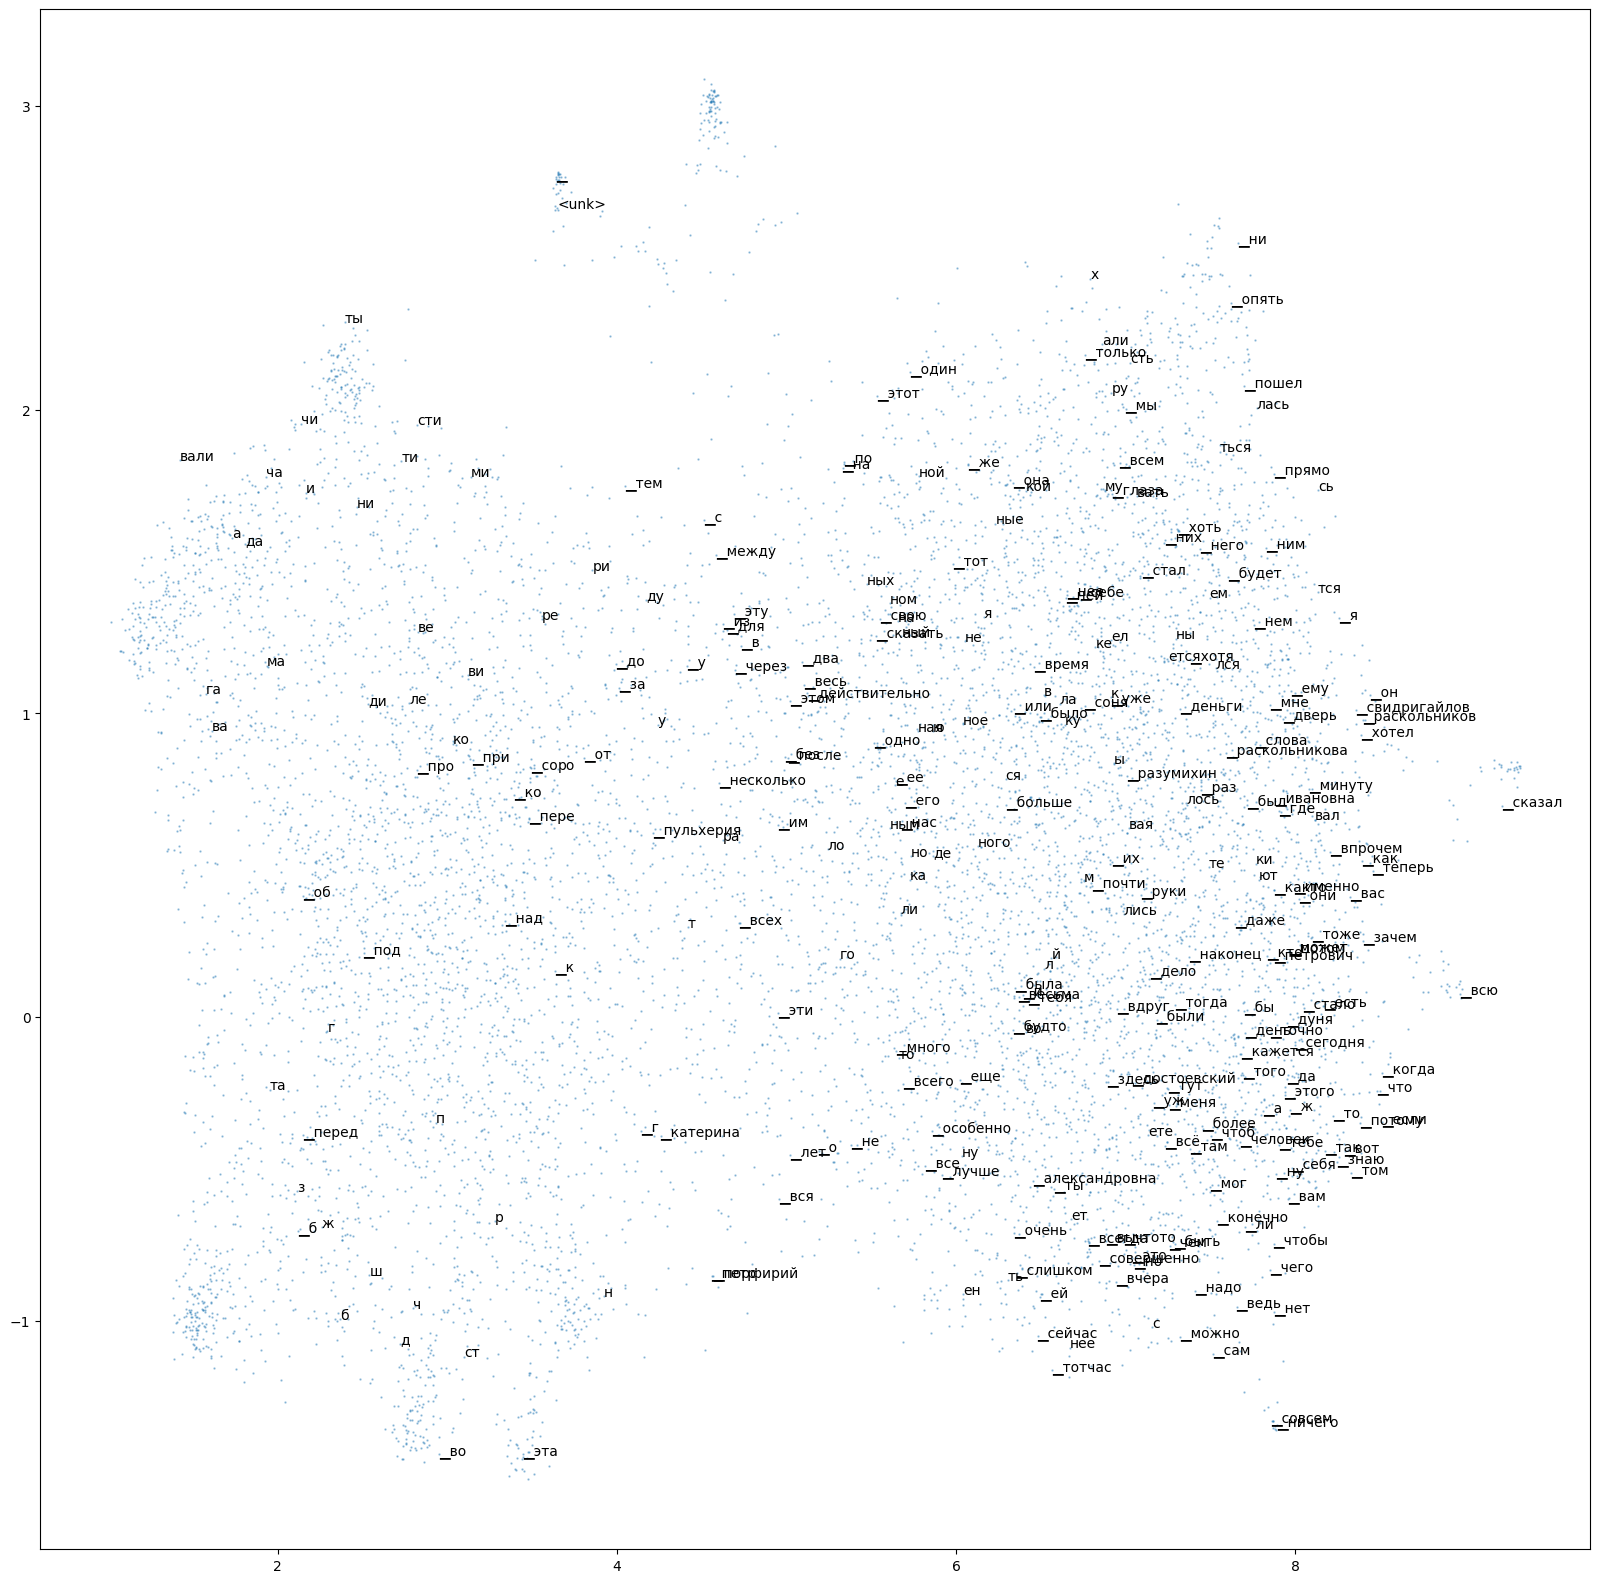

In [ ]:
# Визуализация обученных эмбеддингов
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(embeddings[:, 0], embeddings[:, 1], s=0.5, alpha=0.4)

# берём 300 наиболее частых
whitelist = frozenset(corpus_df.token_ids.value_counts().index[:300].values)
for i, txt in enumerate(embeddings):
    token_id = ids2token_ids[i]
    if token_id not in whitelist:
        continue
    ax.annotate(vocabs[token_id][0],
                (embeddings[i][0], embeddings[i][1]))
plt.savefig('vecs_%s.svg'%model_type)